In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"D:\Project\data nyc fare data\cab_rides.csv")
df.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [3]:
df.shape

(693071, 10)

In [11]:
df.dtypes

distance            float64
cab_type             object
time_stamp            int64
destination          object
source               object
price               float64
surge_multiplier    float64
id                   object
product_id           object
name                 object
dtype: object

In [4]:
df.isnull().sum()

distance                0
cab_type                0
time_stamp              0
destination             0
source                  0
price               55095
surge_multiplier        0
id                      0
product_id              0
name                    0
dtype: int64

In [5]:
(df.isnull().sum()/df.shape[0])*100

distance            0.000000
cab_type            0.000000
time_stamp          0.000000
destination         0.000000
source              0.000000
price               7.949402
surge_multiplier    0.000000
id                  0.000000
product_id          0.000000
name                0.000000
dtype: float64

### 1. Distance column

In [8]:
df['distance'].describe()

count    693071.000000
mean          2.189430
std           1.138937
min           0.020000
25%           1.280000
50%           2.160000
75%           2.920000
max           7.860000
Name: distance, dtype: float64

<Axes: xlabel='distance', ylabel='Count'>

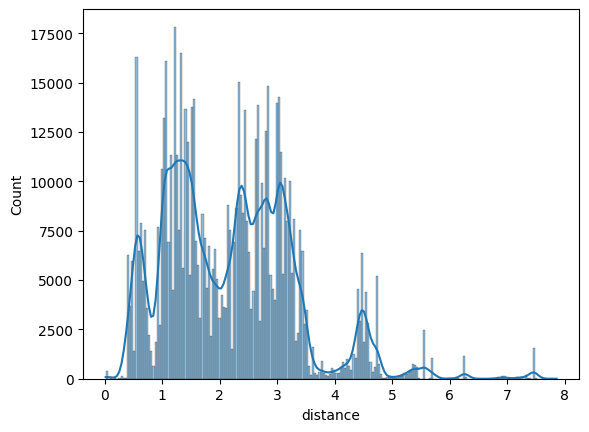

In [7]:
sns.histplot(data=df,x=df['distance'],kde=True)

In [9]:
df['distance'].skew()

np.float64(0.8343950077972692)

<Axes: ylabel='distance'>

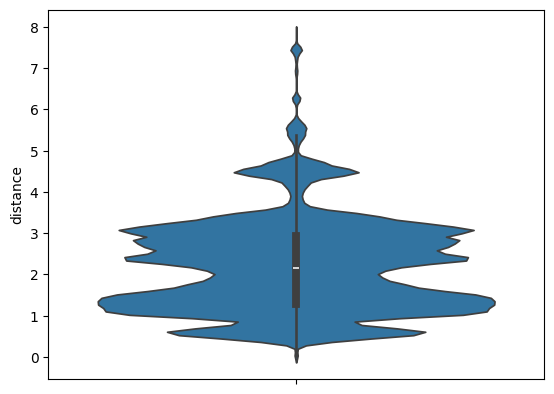

In [10]:
sns.violinplot(df['distance'])

<Axes: xlabel='distance', ylabel='price'>

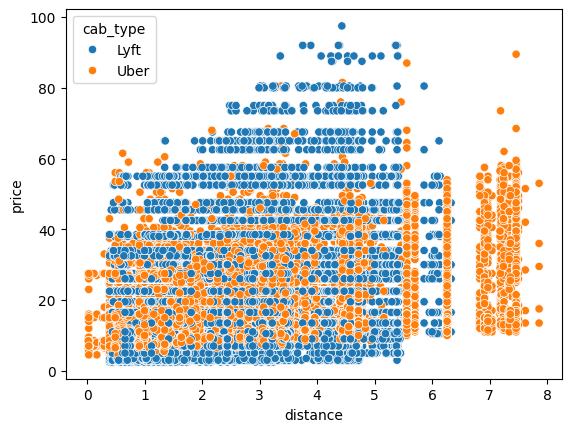

In [13]:
sns.scatterplot(data=df,x='distance',y='price',hue='cab_type')

In [27]:
df[df['price'].isna()]

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
18,1.11,Uber,1543673584211,West End,North End,NaN,1.0,fa5fb705-03a0-4eb9-82d9-7fe80872f754,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
31,2.48,Uber,1543794776318,South Station,Beacon Hill,NaN,1.0,eee70d94-6706-4b95-a8ce-0e34f0fa8f37,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
40,2.94,Uber,1543523885298,Fenway,North Station,NaN,1.0,7f47ff53-7cf2-4a6a-8049-83c90e042593,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
60,1.16,Uber,1544731816318,West End,North End,NaN,1.0,43abdbe4-ab9e-4f39-afdc-31cfa375dc25,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
69,2.67,Uber,1543583283653,Beacon Hill,North End,NaN,1.0,80db1c49-9d51-4575-a4f4-1ec23b4d3e31,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
...,...,...,...,...,...,...,...,...,...,...
693025,2.50,Uber,1544886913192,Beacon Hill,South Station,NaN,1.0,70ad9983-92dd-4cdf-af16-732e7e9ee9d0,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
693047,0.91,Uber,1543456028123,Beacon Hill,Haymarket Square,NaN,1.0,84e05ef0-781a-4bd5-a593-bbbf659d4ba0,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
693049,1.79,Uber,1543456028123,Beacon Hill,North End,NaN,1.0,885ef635-299e-45cf-8052-c45a39e9822a,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
693060,1.61,Uber,1543728484149,Haymarket Square,Theatre District,NaN,1.0,50a7b6be-ed2a-4a11-8d36-73bd977ad66a,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi


In [14]:
df.describe()

,distance,time_stamp,price,surge_multiplier
count,693071.000000,6.930710e+05,637976.000000,693071.000000
mean,2.189430,1.544046e+12,16.545125,1.013870
std,1.138937,6.891925e+08,9.324359,0.091641
min,0.020000,1.543204e+12,2.500000,1.000000
25%,1.280000,1.543444e+12,9.000000,1.000000
50%,2.160000,1.543737e+12,13.500000,1.000000
75%,2.920000,1.544828e+12,22.500000,1.000000
max,7.860000,1.545161e+12,97.500000,3.000000


In [15]:
df.dtypes

distance            float64
cab_type             object
time_stamp            int64
destination          object
source               object
price               float64
surge_multiplier    float64
id                   object
product_id           object
name                 object
dtype: object

In [13]:
df.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name'],
      dtype='object')

In [16]:
pd.to_datetime(df['time_stamp'])

0        1970-01-01 00:25:44.952607890
1        1970-01-01 00:25:43.284023677
2        1970-01-01 00:25:43.366822198
3        1970-01-01 00:25:43.553582749
4        1970-01-01 00:25:43.463360223
                      ...             
693066   1970-01-01 00:25:43.708385534
693067   1970-01-01 00:25:43.708385534
693068   1970-01-01 00:25:43.708385534
693069   1970-01-01 00:25:43.708385534
693070   1970-01-01 00:25:43.708385534
Name: time_stamp, Length: 693071, dtype: datetime64[ns]

In [17]:
weather = pd.read_csv(r"D:\Project\data nyc fare data\weather.csv")
weather.head()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49


In [18]:
weather.shape

(6276, 8)

In [26]:
weather['clouds'].value_counts()

clouds
1.00    1100
0.99     224
0.98     192
0.97     190
0.92     135
        ... 
0.23      12
0.66      10
0.30       6
0.02       4
0.10       4
Name: count, Length: 100, dtype: int64

In [23]:
weather['time_stamp'].value_counts()

time_stamp
1545068701    12
1543819974    12
1543451968    12
1543347920    12
1543751574    12
              ..
1545003902     1
1543320921     1
1543830779     1
1544939102     1
1545086706     1
Name: count, Length: 840, dtype: int64

In [24]:
weather[weather['time_stamp'] == 1545068701]

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
80,40.01,Back Bay,0.95,1000.90,NaN,1545068701,0.81,6.46
81,39.78,Beacon Hill,0.95,1000.89,NaN,1545068701,0.81,6.44
82,40.15,Boston University,0.94,1000.91,NaN,1545068701,0.80,6.44
83,40.27,Fenway,0.94,1000.91,NaN,1545068701,0.80,6.47
84,39.89,Financial District,0.96,1000.89,NaN,1545068701,0.81,6.46
85,39.85,Haymarket Square,0.95,1000.89,NaN,1545068701,0.81,6.43
86,39.82,North End,0.96,1000.89,NaN,1545068701,0.81,6.43
87,39.92,North Station,0.95,1000.89,NaN,1545068701,0.81,6.42
88,40.17,Northeastern University,0.94,1000.91,NaN,1545068701,0.80,6.49
89,39.90,South Station,0.95,1000.90,NaN,1545068701,0.81,6.47


In [20]:
data = pd.merge(df,weather,on='time_stamp',how='left')
data.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,temp,location,clouds,pressure,rain,humidity,wind
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df.shape

(693071, 10)

In [21]:
data.isnull().sum()

distance                 0
cab_type                 0
time_stamp               0
destination              0
source                   0
price                55095
surge_multiplier         0
id                       0
product_id               0
name                     0
temp                693071
location            693071
clouds              693071
pressure            693071
rain                693071
humidity            693071
wind                693071
dtype: int64